In [1]:
import multiprocessing
import math
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio import Phylo
from featureUtils import BED_file_to_features, feature_to_seq
from sklearn.cluster import AgglomerativeClustering
from Bio.Phylo.PhyloXML import Clade, Phylogeny, Sequence, Phyloxml
from treeFromClusters import features_to_leaves, new_clade, new_phylogeny
from hierarchical_clustering import hierarchical_clustering, compact_phylogeny, fix_phylogeny_branch_length

In [2]:
multiprocessing.cpu_count()

10

In [3]:
references = {seq.id : seq for seq in SeqIO.parse("./data/monomers/chr2_centromere_plus2Mb.fasta", "fasta")}

In [4]:
monomers_as_features = BED_file_to_features("./data/monomers/chr2_StringDecMon2extr_noMorgante.bed")

In [5]:
monomers_as_seqs = [feature_to_seq(feature, references) for feature in monomers_as_features]

In [6]:
len(monomers_as_seqs)

7107

In [7]:
dist_matrix = np.load('data/dist_matrix.npy')

In [8]:
philogeny = hierarchical_clustering(monomers_as_features, dist_matrix)

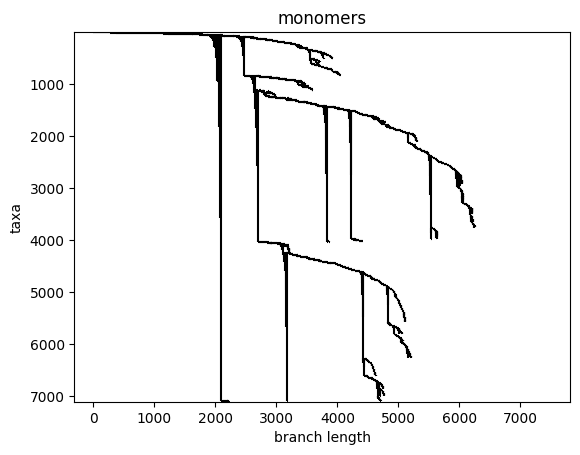

In [9]:
Phylo.draw(philogeny, label_func=(lambda clade_name: None))